# Chapter 3: DBSCAN

## Activity 4 and 5

In [1]:
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
%matplotlib inline

# Set sig digits for output
np.set_printoptions(precision=3)

### Activity 4: Implement DBSCAN from Scratch 

<b>Scenario:</b> You are given a data set without prior background information and are requested to find the clusters that fit the data set best.

<b>Aim:</b> Given what you’ve learned about DBSCAN and distance metrics from prior lessons, build an implementation of DBSCAN from scratch in Python. You are free to use NumPy and SciPy to evaluate distances here.


In [2]:
X_blob, y_blob = make_blobs(n_samples=500, centers=4, n_features=2, random_state=800)

In [3]:
def scratch_DBSCAN(x, eps, min_pts):
    """
    param x (list of vectors): your dataset to be clustered
    param eps (float): neigborhood radius threshold
    param min_pts (int): minimum number of points threshold for a nieghborhood to be a cluster
    """
 
    # Build a label holder that is comprised of all 0s
    labels = [0]* x.shape[0]

    # Arbitrary starting "current cluster" ID    
    C = 0
    
    # For each point p in x...
    # ('p' is the index of the datapoint, rather than the datapoint itself.)
    for p in range(0, x.shape[0]):
    
        # Only unvisited points can be evaluated as neighborhood centers
        if not (labels[p] == 0):
            continue
        
        # Find all of p's neighbors.
        neighbors = neighborhood_search(x, p, eps)
        
        # If there are not enough neighbor points, then it is classified as noise (-1).
        # Otherwise we can use this point as a neighborhood cluster
        if len(neighbors) < min_pts:
            labels[p] = -1    
        else: 
            C += 1
            neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts)
    
    return labels


def neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts):

    # Assign the cluster label to original point
    labels[p] = C
    
    # Look at each neighbor of p (by index, not the points themselves) and evaluate
    i = 0
    while i < len(neighbors):    
        
        # Get the next point from the queue.        
        potential_neighbor_ix = neighbors[i]
       
        # If potential_neighbor_ix is noise from previous runs, we can assign it to current cluster
        if labels[potential_neighbor_ix] == -1:
            labels[potential_neighbor_ix] = C
        
        # Otherwise, if potential_neighbor_ix is unvisited, we can add it to current cluster
        elif labels[potential_neighbor_ix] == 0:
            labels[potential_neighbor_ix] = C
            
            # Further find neighbors of potential neighbor
            potential_neighbors_cluster = neighborhood_search(x, potential_neighbor_ix, eps)
            
            if len(potential_neighbors_cluster) >= min_pts:
                neighbors = neighbors + potential_neighbors_cluster      
        
        # Evaluate next neighbor
        i += 1        

def neighborhood_search(x, p, eps):
    neighbors = []
    
    # For each point in the dataset...
    for potential_neighbor in range(0, x.shape[0]):
        
        # If a nearby point falls below the neighborhood radius threshold, add to neighbors list
        if np.linalg.norm(x[p] - x[potential_neighbor]) < eps:
            neighbors.append(potential_neighbor)
            
    return neighbors

### Evaluate Performance

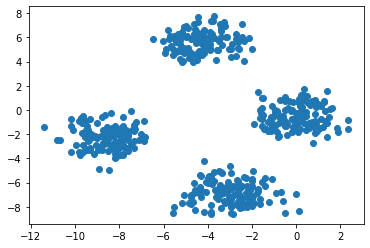

In [4]:
# Visualize the data
plt.scatter(X_blob[:,0], X_blob[:,1])
plt.show()

In [5]:
labels = scratch_DBSCAN(X_blob, 0.6, 5)

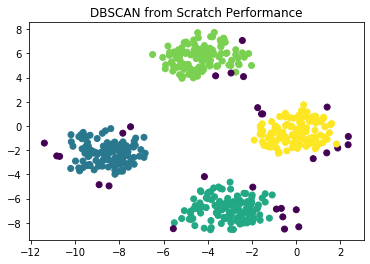

In [6]:
# Visualize the data
plt.scatter(X_blob[:,0], X_blob[:,1], c=labels)
plt.title("DBSCAN from Scratch Performance")
plt.show()

As you may have noticed it takes quite some time for a custom implementation to run. This is because we explored the non-vectorized version of this algorithm for the sake of clarity. Moving forward you should aim to use the DBSCAN implementation provided by Sci-Kit Learn as it is highly optimized.

### Activity 5: Compare DBSCAN with K-Means and Hierarchical Clustering

<b>Scenario: </b> You are managing store inventory and received a large shipment of wine, but the brand labels fell off the bottles during transit. Fortunately, your supplier provided you with the chemical readings for each bottle along with their respective serial numbers. Unfortunately, you aren’t able to open each bottle of wine and taste test the difference – you must find a way to group the unlabeled bottles back together according to their chemical readings! You know from the order list that you ordered 3 different types of wine and are given only 2 wine attributes to group the wine types back together.

<b>Aim: </b> In Lesson 2 we were able to see how K-Means and Heirarchical Clustering performed on the wine data set. In our best case scenario we were able to achieve a silhouette score of 0.59. Using Sci-Kit Learn's implementation of DBSCAN let's see if we can get even better clustering.

<b>Outcome: </b> By completing this activity you will be recreating a full workflow of a clustering problem. You have already made yourself familiar with the data in Lesson 2, and by the end of this activity you will have performed model selection to find the best model and hyperparameters for your data set.


In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Load Wine data set
wine_df = pd.read_csv("wine_data.csv")

# Show sample of data set
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


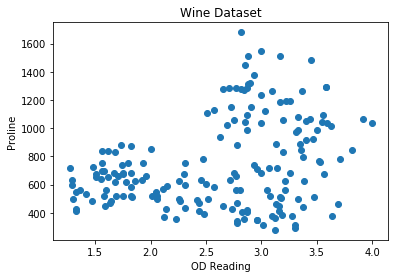

In [10]:
# Visualize the data
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [11]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

# Generate clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

Evaluate a few different DBSCAN hyperparameters

In [12]:
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[35,3]]

for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.3997987919957757
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35258611037074095
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.43763797761597306
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2711660466706248
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.4600630149335495
Eps:  35 Min Samples:  3
DBSCAN Clustering:  0.5368842164535846


In [13]:
# Generate clusters using DBSCAN
db = DBSCAN(eps=35, min_samples = 3)
db_clusters = db.fit_predict(wine_df)

### Visualize Wine Clusters

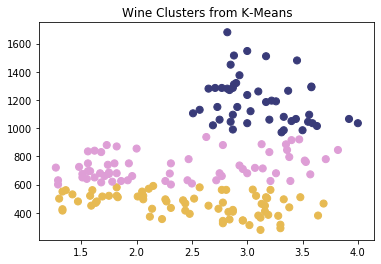

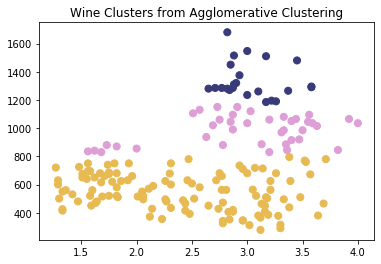

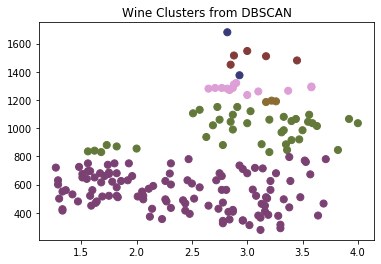

In [14]:
plt.title("Wine Clusters from K-Means")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=km_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=ac_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c=db_clusters,s=50, cmap='tab20b')
plt.show()

In [15]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))
print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agg Clustering:  0.5988495817462
DBSCAN Clustering:  0.5368842164535846


Notice that more advanced clustering algorithms such as DBSCAN are not perfect. Most of the time it is learning to find the right clustering approach for the data set you are working on at the time. If DBSCAN didn't perform best for you here please discuss with your classmates why that was the case.